## Recovery Test
**This test is taken from MLU examples.**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ttim
import pandas as pd

Set basic parameters for the model:

In [2]:
H = 27  # aquifer thickness [m]
zt = -10  # upper boundary of aquifer
zb = zt - H
rw = 0.155  # well screen radius [m]
Q = 1848  # constant discharge rate [m^3/d]
t0 = 0.013889  # time stop pumping [d]

Load data:

In [3]:
data = np.loadtxt("data/recovery.txt", skiprows=1)
t = data[:, 0]
h = data[:, 1]

Conceptual model:

In [4]:
ml1 = ttim.ModelMaq(
    kaq=[50, 40],
    z=[0, zt, zb, -68, -88],
    c=[1000, 1000],
    Saq=[1e-4, 5e-5],
    topboundary="semi",
    tmin=1e-4,
    tmax=0.04,
)
w1 = ttim.Well(ml1, xw=0, yw=0, rw=rw, res=1, tsandQ=[(0, Q), (t0, 0)], layers=0)
ml1.solve()

self.neq  1
solution complete


In [5]:
ca1 = ttim.Calibrate(ml1)
ca1.set_parameter(name="kaq0", initial=50, pmin=0)
ca1.set_parameter(name="Saq0", initial=1e-4, pmin=0)
ca1.set_parameter_by_reference(name="res", parameter=w1.res[:], initial=1, pmin=0)
ca1.seriesinwell(name="obs", element=w1, t=t, h=h)
ca1.fit()

.....................................................................................................................................................................................................................................................................................................................................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 386
    # data points      = 35
    # variables        = 3
    chi-square         = 0.00106334
    reduced chi-square = 3.3229e-05
    Akaike info crit   = -358.059061
    Bayesian info crit = -353.393016
[[Variables]]
    kaq0:  44.5282566 +/- 0.64521411 (1.45%) (init = 50)
    Saq0:  6.3906e-06 +/- 9.7664e-07 (15.28%) (init = 0.0001)
    res:   0.01620422 +/- 5.7744e-04 (3.56%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, res)  =  0.976
    C(Saq0, res)  =  0.951
    C(kaq0, Saq

In [6]:
display(ca1.parameters)
print("RMSE:", ca1.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,44.5283,6.452141e-01,1.449,0,inf,50,[44.52825664300624]
Saq0,6.39061e-06,9.766419e-07,15.2825,0,inf,0.0001,[6.390608494610817e-06]
res,0.0162042,5.774437e-04,3.56354,0,inf,1,[0.016204215932634325]


RMSE: 0.005511911936638888


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


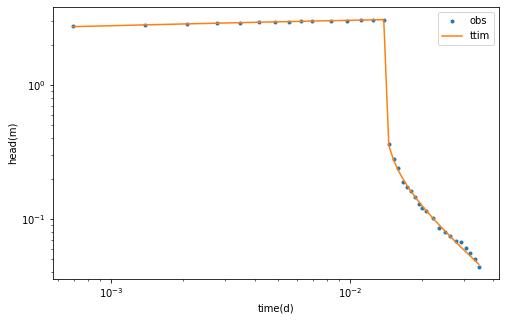

In [7]:
hm1 = w1.headinside(t)
plt.figure(figsize=(8, 5))
plt.loglog(t, -h, ".", label="obs")
plt.loglog(t, -hm1[0], label="ttim")
plt.xlabel("time(d)")
plt.ylabel("head(m)")
plt.legend()
plt.savefig("C:/Users/DELL/Python Notebook/MT BE/Fig/recovery-double.eps");

Add wellbore storage:

In [8]:
ml2 = ttim.ModelMaq(
    kaq=[50, 40],
    z=[0, zt, zb, -68, -88],
    c=[1000, 1000],
    Saq=[1e-4, 5e-5],
    topboundary="semi",
    tmin=1e-4,
    tmax=0.04,
)
w2 = ttim.Well(
    ml2, xw=0, yw=0, rw=rw, rc=0.155, res=1, tsandQ=[(0, Q), (t0, 0)], layers=0
)
ml2.solve()

self.neq  1
solution complete


In [9]:
ca2 = ttim.Calibrate(ml2)
ca2.set_parameter(name="kaq0", initial=50, pmin=0)
ca2.set_parameter(name="Saq0", initial=1e-4, pmin=0)
ca2.set_parameter_by_reference(name="rc", parameter=w2.rc[:], initial=0.1, pmin=0)
ca2.set_parameter_by_reference(name="res", parameter=w2.res[:], initial=1, pmin=0)
ca2.seriesinwell(name="obs", element=w2, t=t, h=h)
ca2.fit()

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 725
    # data points      = 35
    # variables        = 4
    chi-square         = 0.00106334
    reduced chi-square = 3.4301e-05
    Akaike info crit   = -356.059080
    Bayesia

In [10]:
display(ca2.parameters)
print("RMSE:", ca2.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,44.5299,0.667719,1.49948,0,inf,50,[44.52989684168029]
Saq0,6.39092e-06,0.000001,15.8049,0,inf,0.0001,[6.390921652332793e-06]
rc,0.00353647,0.221147,6253.32,0,inf,0.1,[0.003536472392082546]
res,0.0162052,0.000592,3.6551,0,inf,1,[0.016205248228838176]


RMSE: 0.005511910430700859


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


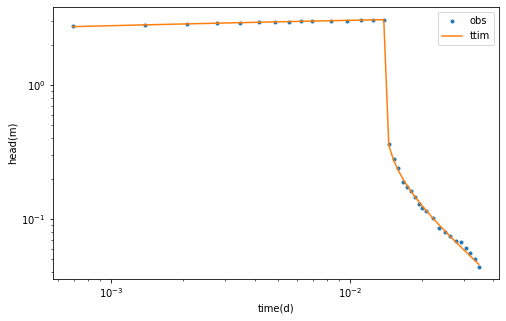

In [11]:
hm2 = w2.headinside(t)
plt.figure(figsize=(8, 5))
plt.loglog(t, -h, ".", label="obs")
plt.loglog(t, -hm2[0], label="ttim")
plt.xlabel("time(d)")
plt.ylabel("head(m)")
plt.legend()
plt.savefig("C:/Users/DELL/Python Notebook/MT BE/Fig/recovery-double rc.eps");

Simulation with rc has a worse performance. RMSE increases, and the Akaike criteria is much larger than the former model. Thus, rc should be removed.

Single aquifer model:

In [12]:
ml0 = ttim.ModelMaq(
    kaq=50, z=[0, zt, zb], c=1000, Saq=1e-4, topboundary="semi", tmin=1e-4, tmax=0.04
)
w0 = ttim.Well(ml0, xw=0, yw=0, rw=rw, res=1, tsandQ=[(0, Q), (t0, 0)], layers=0)
ml0.solve()

self.neq  1
solution complete


In [13]:
ca0 = ttim.Calibrate(ml0)
ca0.set_parameter(name="kaq0", initial=50, pmin=0)
ca0.set_parameter(name="Saq0", initial=1e-4, pmin=0)
ca0.set_parameter_by_reference(name="res", parameter=w0.res[:], initial=1)
ca0.seriesinwell(name="obs", element=w0, t=t, h=h)
ca0.fit()

....................................................................................................................................................................................................................................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 289
    # data points      = 35
    # variables        = 3
    chi-square         = 0.00106439
    reduced chi-square = 3.3262e-05
    Akaike info crit   = -358.024604
    Bayesian info crit = -353.358560
[[Variables]]
    kaq0:  44.5517010 +/- 0.65622200 (1.47%) (init = 50)
    Saq0:  3.2314e-06 +/- 4.9354e-07 (15.27%) (init = 0.0001)
    res:   0.01502958 +/- 5.9551e-04 (3.96%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, res)  =  0.977
    C(Saq0, res)  =  0.949
    C(kaq0, Saq0) =  0.862


In [14]:
display(ca0.parameters)
print("RMSE:", ca0.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,44.5517,6.562220e-01,1.47294,0,inf,50,[44.551700962690695]
Saq0,3.23139e-06,4.935356e-07,15.2732,0,inf,0.0001,[3.2313908613357256e-06]
res,0.0150296,5.955128e-04,3.96227,-inf,inf,1,[0.015029581626088763]


RMSE: 0.005514625729462559


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


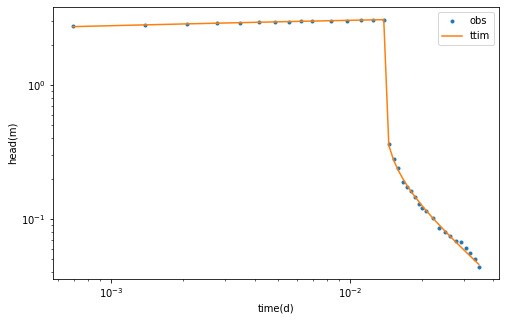

In [15]:
hm = w0.headinside(t)
plt.figure(figsize=(8, 5))
plt.loglog(t, -h, ".", label="obs")
plt.loglog(t, -hm[0], label="ttim")
plt.xlabel("time(d)")
plt.ylabel("head(m)")
plt.legend()
plt.savefig("C:/Users/DELL/Python Notebook/MT BE/Fig/recovery-single.eps");

Besides linear curve fitting solution, MLU uses log-drawdown-curve-fitting as comparision.
fitm is a version with changed objective function of the Calibrate function. The original objective function is 'h_observed - h_predicted', while for log drawdown curve fitting solution, the objective function has been changed to 'log10(-h_observed) - log10(-h_predicted)'.

In [17]:
ml3 = ttim.ModelMaq(
    kaq=[50, 40],
    z=[0, zt, zb, -68, -88],
    c=[1000, 1000],
    Saq=[1e-4, 5e-5],
    topboundary="semi",
    tmin=1e-4,
    tmax=0.04,
)
w3 = ttim.Well(ml3, xw=0, yw=0, rw=rw, res=1, tsandQ=[(0, Q), (t0, 0)], layers=0)
ml3.solve()

self.neq  1
solution complete


In [18]:
ca3 = ttim.Calibrate(ml3)
ca3.set_parameter(name="kaq0", initial=50, pmin=0)
ca3.set_parameter(name="Saq0", initial=1e-4, pmin=0)
ca3.set_parameter_by_reference(name="res", parameter=w3.res[:], initial=1, pmin=0)
ca3.seriesinwell(name="obs", element=w3, t=t, h=h)
ca3.fit(report=True)

.............................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 74
    # data points      = 35
    # variables        = 3
    chi-square         = 0.00536097
    reduced chi-square = 1.6753e-04
    Akaike info crit   = -301.438514
    Bayesian info crit = -296.772469
[[Variables]]
    kaq0:  45.2992097 +/- 0.72068793 (1.59%) (init = 50)
    Saq0:  7.2479e-06 +/- 6.9225e-07 (9.55%) (init = 0.0001)
    res:   0.01681852 +/- 6.0777e-04 (3.61%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) =  0.907
    C(kaq0, res)  =  0.840
    C(Saq0, res)  =  0.807


In [19]:
display(ca3.parameters)
print("RMSE:", ca3.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,45.2992,7.206879e-01,1.59095,0,inf,50,[45.29920969773198]
Saq0,7.24786e-06,6.922490e-07,9.55108,0,inf,0.0001,[7.247863323955883e-06]
res,0.0168185,6.077721e-04,3.61371,0,inf,1,[0.016818522068650976]


RMSE: 0.01237621536126682


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


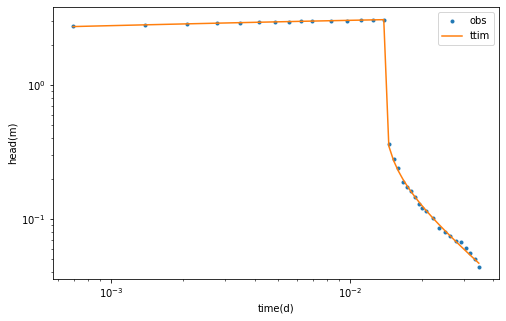

In [20]:
hm3 = w3.headinside(t)
plt.figure(figsize=(8, 5))
plt.loglog(t, -h, ".", label="obs")
plt.loglog(t, -hm3[0], label="ttim")
plt.xlabel("time(d)")
plt.ylabel("head(m)")
plt.legend()
plt.savefig("C:/Users/DELL/Python Notebook/MT BE/Fig/recovery-double log.eps");

According to rmse and the Akaike criteria, log curve fitting solution performs worse than linear curve fitting. The results reported in following table are from models calibrated by linear curve fitting solution.

### Summary of values modeled by different methods:

In [21]:
ta = pd.DataFrame(
    columns=["k [m/d]", "Ss [1/m]", "res"],
    index=["MLU-log", "TTim-single layer", "TTim-two layers"],
)
ta.loc["TTim-single layer"] = ca0.parameters["optimal"].values
ta.loc["TTim-two layers"] = ca1.parameters["optimal"].values
ta.loc["MLU-log"] = [51.530, 8.16e-04, 0.022]
ta["RMSE [m]"] = [0.00756, ca0.rmse(), ca1.rmse()]
ta

,k [m/d],Ss [1/m],res,RMSE [m]
MLU-log,51.53,0.000816,0.022,0.007560
TTim-single layer,44.5517,3.23139e-06,0.0150296,0.005515
TTim-two layers,44.5283,6.39061e-06,0.0162042,0.005512
